## Loan Data

**Recap Overview**

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

**Notebook objective**

This notebook will provide the initial analysis and EDA finding. I will probably add some other parts, including ML, to this notebook later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


C:\Users\Kamran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kamran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kamran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kamran\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def now():
    tm = datetime.now().strftime('%Y-%m-%d  %H:%M:%S')
    return tm

def read_CSV_file(df):
    data_file = pd.read_csv(df)
    print('{} Reading.. {}'.format(now(),df))
    print('{} the data contains {} observations and {} features'.format(now(),data_file.shape[0],data_file.shape[1]))
    return data_file
    
def for_NaN_value(df):
    try:
        if (isinstance(df,pd.DataFrame)):
            df_na =pd.concat([df.isnull().any(),df.isnull().sum(),(df.isnull().sum()*100)/df.shape[0]],
                             axis=1, keys=['NaN features','total NaN value','percentage of missing value'])
            df_na = df_na.loc[df_na['NaN features']== True ]
            return df_na
        else:
            print('{}: data is in different format'.format(now()))
    
    except (RuntimeError,UnboundLocalError):
        print('{} something is wrong'.format(now()))
        

In [11]:
data = read_CSV_file('C:\\Users\\Kamran\\Downloads\\loandata\\Loan.csv')
print('\n\n')
print(for_NaN_value(data))

2020-03-01  18:46:53 Reading.. C:\Users\Kamran\Downloads\loandata\Loan.csv
2020-03-01  18:46:53 the data contains 500 observations and 11 features



               NaN features  total NaN value  percentage of missing value
paid_off_time          True              100                         20.0
past_due_days          True              300                         60.0


In [3]:
#use_cols = ['Loan_ID','laon_status','Principal','terms','effective_date','due_date',
#            'paid_off_time','past_due_days','age','education','Gender']

#data = pd.read_csv('C:\\Users\\Kamran\\Downloads\\loandata\\Loan.csv')


data = read_CSV_file('C:\\Users\\Kamran\\Downloads\\loandata\\Loan.csv')
print('\n\n')
print(for_NaN_value(data))

2020-03-01  18:29:48 Reading.. C:\Users\Kamran\Downloads\loandata\Loan.csv
2020-03-01  18:29:48 the data contains 500 observations and 11 features



               NaN features  total NaN value  percentage of missing value
paid_off_time          True              100                         20.0
past_due_days          True              300                         60.0


***Looking from above information, there are some missing data in 2 fields.***

### Data Content

- ***Loan_id*** : A unique loan number assigned to each loan customers
- ***Loan_status*** : Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts
- ***Principal*** : Basic principal loan amount at the origination
- ***terms*** : Can be weekly (7 days), biweekly, and monthly payoff schedule
- ***Effective_date*** : When the loan got originated and took effects
- ***Due_date*** : Since it’s one-time payoff schedule, each loan has one single due date
- ***Paidoff_time*** : The actual time a customer pays off the loan
- ***Pastdue_days*** : How many days a loan has been past due
- ***Age, education, gender*** : A customer’s basic demographic information

Let's look at some sample data.

In [4]:
data.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
#data.info()
#data.describe()

OK from the sample, we can see that it's making senses for those who have **paid the loan** not to have data in **past_due_days** columns.


### 1. EDA

In this section, let's explore the data in-depth.

#### 1. Loan_ID - This is just the identifier for each loan by each customers, we can ignore this field and will drop it at the end of EDA process

##### 2. loan_status
This field is actually the target variables we are trying to predict. Let's look at the LoV within the column and the sizing.

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


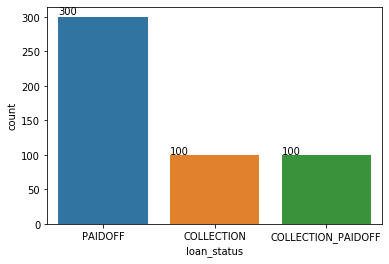

In [117]:
print(data['loan_status'].unique())
ax = sns.countplot('loan_status',data = data)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

We have 3 labels for this target variables with the ratio of 3:1:1 (paid off: collection : collection paid off).

##### 3. Principal
This is the loan amount at the origination. 

In [118]:
data.Principal.unique()

array([1000,  300,  800,  900,  700,  500], dtype=int64)

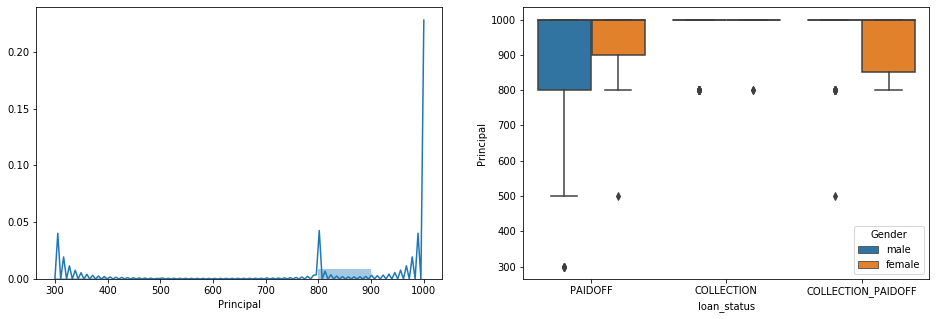

In [159]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=data, ax=axs[1],hue='Gender')
sns.distplot(data.Principal, bins=range(300, 1000, 100), ax=axs[0],kde = True)

Based on distribution most of population borrowed loan of 1000(USD)

from box plot its clear that female candidates are having more dues.

In [85]:
grpby = data[['loan_status', 'Principal', 'Loan_ID','Gender']].groupby(['loan_status','Principal','Gender'])
grpby.count()

Loan_ID
loan_status        Principal Gender         
COLLECTION         800       female        2
                             male         21
                   1000      female        8
                             male         69
COLLECTION_PAIDOFF 500       male          1
                   800       female        4
                             male         15
                   1000      female       10
                             male         70
PAIDOFF            300       male          6
                   500       female        1
                             male          1
                   700       male          1
                   800       female       12
                             male         57
                   900       female        1
                             male          1
                   1000      female       39
                             male        181

In [92]:
grpby = data[['loan_status', 'Principal','Gender']].groupby(['loan_status','Gender'])
grpby.sum()

Principal
loan_status        Gender           
COLLECTION         female       9600
                   male        85800
COLLECTION_PAIDOFF female      13200
                   male        82500
PAIDOFF            female      50000
                   male       230500

From this data its clear that male candidate is having more money to paidoff,collection and collection_paid off which makes above box plot meaningless.
or its me who is not able to plot it properly.
with the help Tebleu i am able to do what i actually want to represent and here its link
[boxplot using Tableu](https://public.tableau.com/profile/kamran.shaikh#!/vizhome/loan_status/Sheet1?publish=yes)

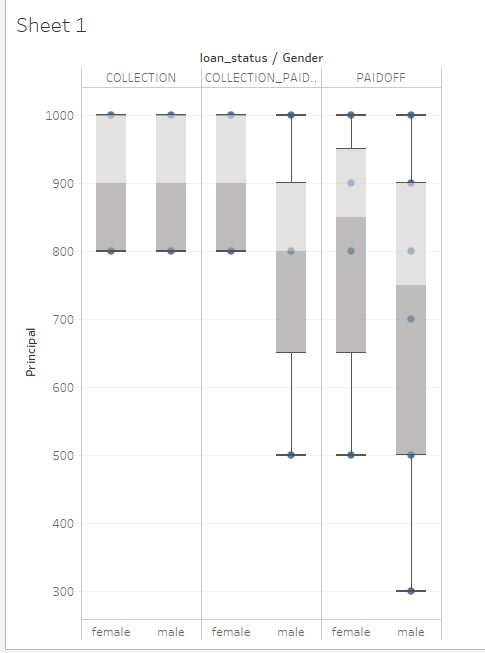

In [174]:
from IPython import display
display.Image(filename= r'C:/Users/Kamran/Pictures/boxplot.JPG')

##### 4. Terms
This is the payoff schedule, which can be in week, month etc.

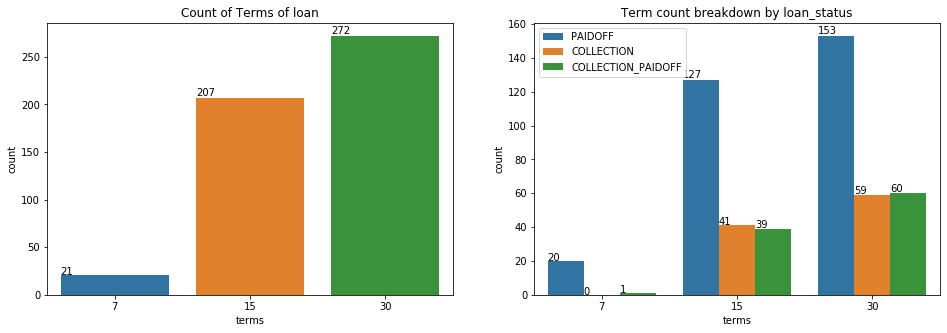

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(loan_data.terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='terms', hue='loan_status', data=loan_data, ax=axs[1])
axs[1].set_title("Term count breakdown by loan_status")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')

##### 5, 6, 7, 8. effective_date, due_date, paid_off_time, and past_due_days

These data points are essentially related to the date of the loan and payment.

C:\Users\Kamran\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kamran\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


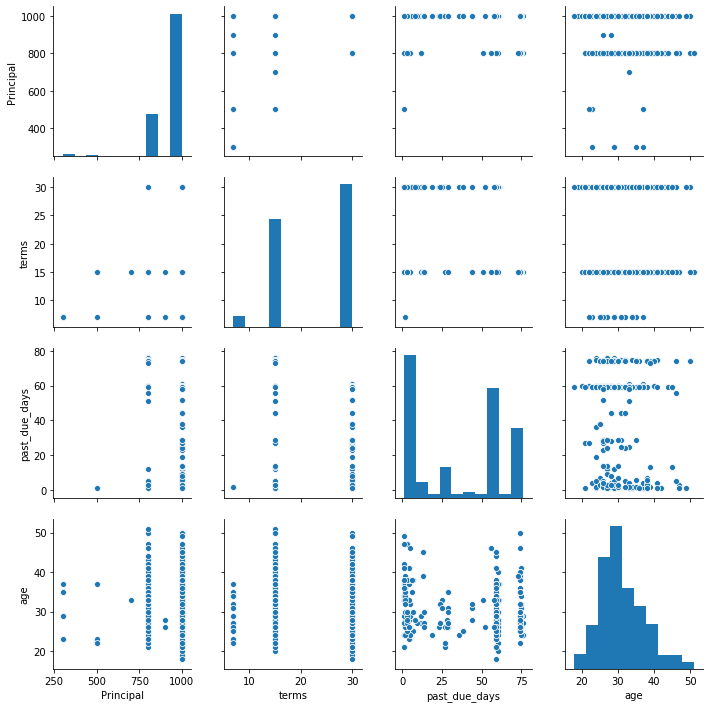

In [7]:
for_pair_plot = data.drop(['Loan_ID','due_date','paid_off_time'],axis=1)
sns.pairplot(for_pair_plot)

In [16]:




#fig2.keys()
#data['loan_status'].value_counts()


#fig3.values()

In [ ]:
#fig1 = data['Gender'].value_counts().plot.bar(color = 'Green')
#fig2 = data['loan_status'].value_counts().plot.bar(color = 'black' )
#fig3 = data['education'].value_counts().plot.bar(color = 'orange')

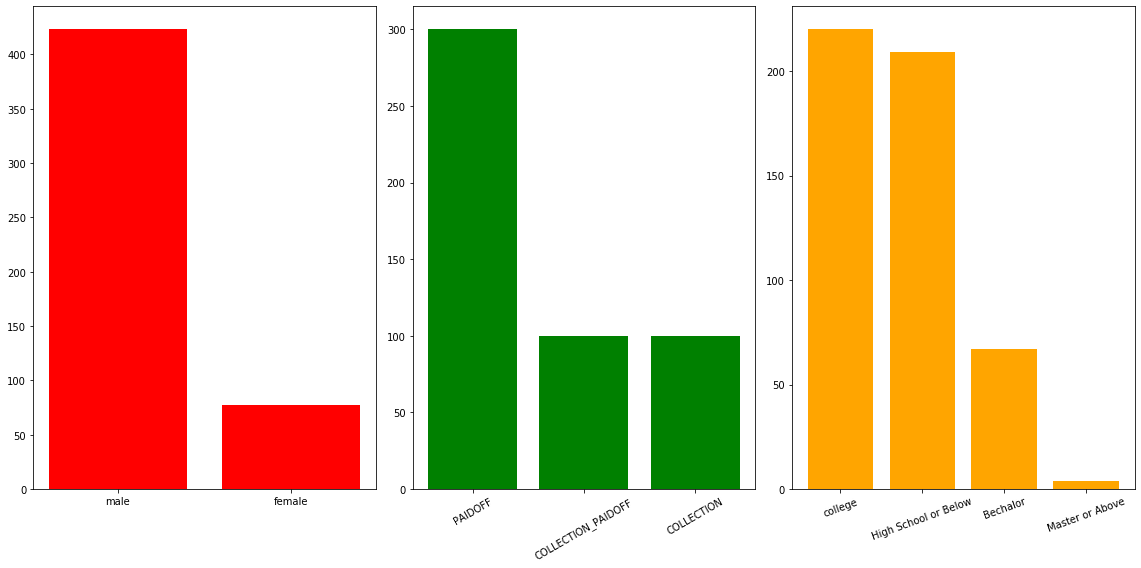

In [25]:
fig1 = dict(data['Gender'].value_counts())
fig2 = dict(data['loan_status'].value_counts())
fig3 = dict(data['education'].value_counts())




fig_, axes = plt.subplots(1, 3, figsize=(16, 8))
axes[0].bar(fig1.keys(),fig1.values(),color = 'red')
axes[0].set_xticklabels(fig1.keys())

axes[1].bar(fig2.keys(),fig2.values(),color = 'green')
axes[1].set_xticklabels(fig2.keys(), rotation=30)
axes[2].bar(fig3.keys(),fig3.values(),color = 'orange')
axes[2].set_xticklabels(fig3.keys(), rotation=20)

plt.tight_layout()

In [6]:
#ax = sns.barplot(x = fig.keys()[0],y =data['Gender'].value_counts() )
#ax1 = sns.barplot(x = ['Male','Female'],y =data['education'].value_counts() )
#ax2 = sns.barplot(x = ['Male','Female'],y =data['leon_status'].value_counts() )

C:\Users\Kamran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


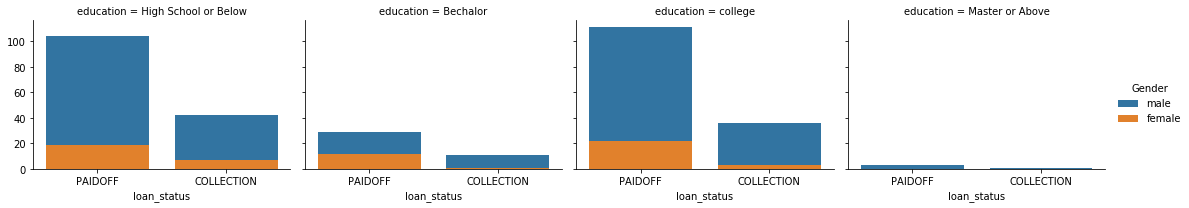

In [44]:
sns_plot = sns.FacetGrid(data,col ='education' ,hue ='Gender',aspect=1.3)
sns_plot.map(sns.countplot,'loan_status').add_legend()

In [45]:
data.groupby('loan_status')['Principal'].sum()

loan_status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64

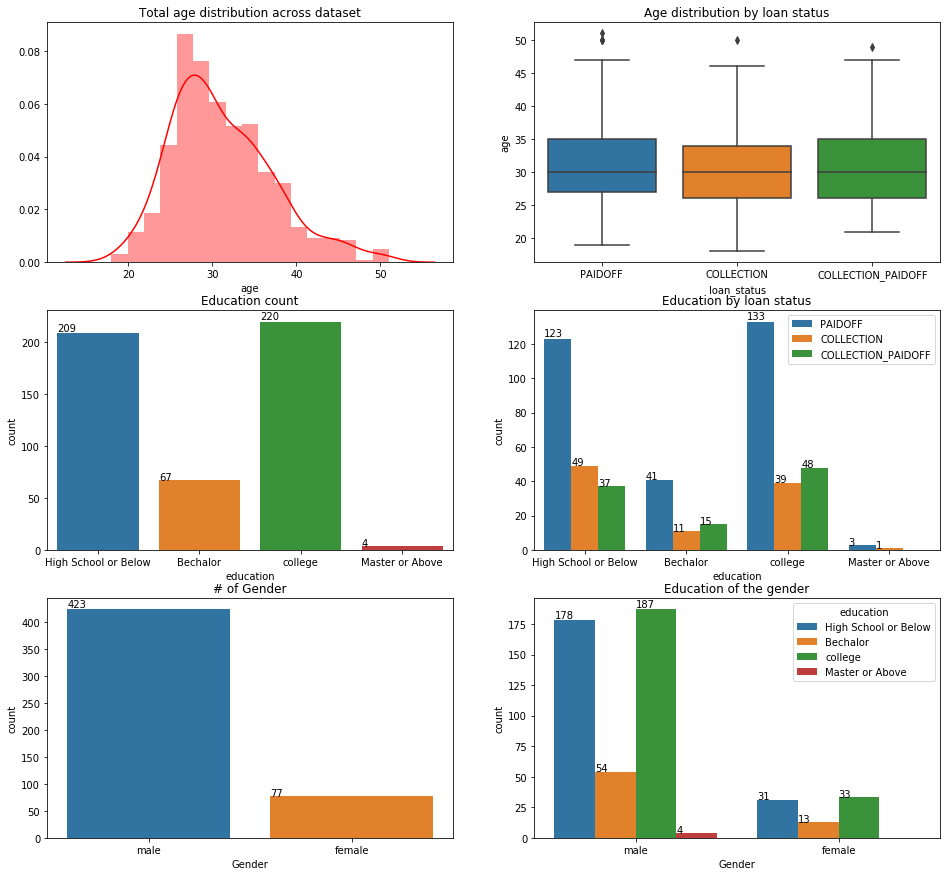

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(16, 15))
sns.distplot(data.age, ax=axs[0][0],color = 'red')
axs[0][0].set_title("Total age distribution across dataset")
sns.boxplot(x='loan_status', y='age', data=data, ax=axs[0][1])
axs[0][1].set_title("Age distribution by loan status")
sns.countplot(x='education', data=data, ax=axs[1][0])
axs[1][0].set_title("Education count")
for t in axs[1][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][0].annotate('', (t.get_x(), 0))
    else:
        axs[1][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='education', data=data, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
for t in axs[1][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][1].annotate('', (t.get_x(), 0))
    else:
        axs[1][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1][1].legend(loc='upper right')
sns.countplot(x='Gender', data=data, ax=axs[2][0])
axs[2][0].set_title("# of Gender")
for t in axs[2][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][0].annotate('', (t.get_x(), 0))
    else:
        axs[2][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='Gender', data=data, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")
for t in axs[2][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][1].annotate('', (t.get_x(), 0))
    else:
        axs[2][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.show();

In [28]:
# Quick view on education + gender => impact to loan_status
pd.crosstab(data.loan_status, data.Gender + "_" + data.education, margins=True)

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


In [29]:
pd.crosstab(data.loan_status, data.Gender + "_" + data.education, margins=True, normalize='all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000,0.014,0.006,0.022,0.084,0.002,0.072,0.2
COLLECTION_PAIDOFF,0.002,0.010,0.016,0.028,0.064,0.000,0.080,0.2
PAIDOFF,0.024,0.038,0.044,0.058,0.208,0.006,0.222,0.6
All,0.026,0.062,0.066,0.108,0.356,0.008,0.374,1.0


In [30]:
pd.crosstab(data.loan_status, data.Gender + "_" + data.education, margins=True, normalize='index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0.000,0.070000,0.030000,0.110000,0.420000,0.010,0.360
COLLECTION_PAIDOFF,0.010,0.050000,0.080000,0.140000,0.320000,0.000,0.400
PAIDOFF,0.040,0.063333,0.073333,0.096667,0.346667,0.010,0.370
All,0.026,0.062000,0.066000,0.108000,0.356000,0.008,0.374


In [31]:
pd.crosstab(data.loan_status, data.Gender + "_" + data.education, margins=True, normalize='columns')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


In [23]:

"""
LDA is used to get better visualisaton results
and with LDA Support Vector Classifier gives best results
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Kamran\\Downloads\\loandata\\Loan.csv')
dataset = dataset.drop(columns = ['effective_date','due_date','paid_off_time'],axis = 1)
#converting nan to 0
dataset.loc[:,'past_due_days'] = dataset.loc[:,'past_due_days'].replace(np.nan,0)
#dealing with categorical data
dataset['Gender']= pd.get_dummies(dataset['Gender'])
#selecting independent variable
X = dataset.loc[:, ['Principal','terms','past_due_days','age','education','Gender']].values
#selecting dependent variable
y = dataset.loc[:,['loan_status']]
#converting string into integer(again categorical data)
y = y.replace(to_replace ='PAIDOFF' ,value = 1)
y = y.replace(to_replace =['COLLECTION_PAIDOFF'] ,value = 2)
y = y.replace(to_replace =['COLLECTION'] ,value = 3)

#dealing with categories of education features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()

#avoiding dummy variable trap
X = X[:,1:]
#converting DataFrame into object
y = y.values

#spliting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:7] = sc.fit_transform(X_train[:,3:7])
X_test[:,3:7] = sc.transform(X_test[:,3:7])

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(C = 100,kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


#this step is to find out bais and variance trade off of model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier,X = X_train, y = y_train,cv = 10)
mean = accuracy.mean()
var = math.pow(accuracy.std(),2)

C:\Users\Kamran\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Kamran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kamran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [24]:
print(f'Confusion Matrix := \n {cm}')
print('\n')
print(f'mean accuracy = {np.around(mean,5)}')
print(f'variance = {np.around(var,5)}')

Confusion Matrix := 
 [[57  0  0]
 [ 3 14  1]
 [ 0  2 23]]


mean accuracy = 0.90486
variance = 0.00252


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


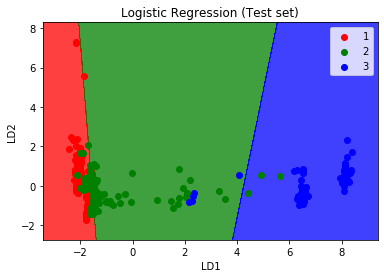

In [14]:
#visualising training data
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
y_set = y_set.reshape(400,)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


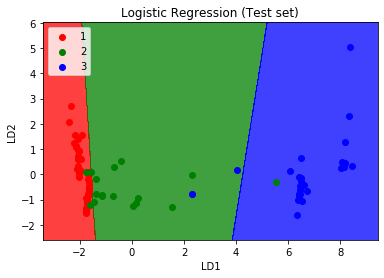

In [13]:
#visualisation of test data
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
y_set = y_set.reshape(100,)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [21]:

    
"""
If we dont need visualisation than in that case Decession Tree is most accurate one
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Kamran\\Downloads\\loandata\\Loan.csv')
dataset = dataset.drop(columns = ['effective_date','due_date','paid_off_time'],axis = 1)
#converting nan to 0
dataset.loc[:,'past_due_days'] = dataset.loc[:,'past_due_days'].replace(np.nan,0)
#dealing with categorical data
dataset['Gender']= pd.get_dummies(dataset['Gender'])
#selecting independent variable
X = dataset.loc[:, ['Principal','terms','past_due_days','age','education','Gender']].values
#selecting dependent variable
y = dataset.loc[:,['loan_status']]
#converting string into integer(again categorical data)
y = y.replace(to_replace ='PAIDOFF' ,value = 1)
y = y.replace(to_replace =['COLLECTION_PAIDOFF'] ,value = 2)
y = y.replace(to_replace =['COLLECTION'] ,value = 3)

#dealing with categories of education features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()

#avoiding dummy variable trap
X = X[:,1:]
#converting DataFrame into object
y = y.values

#spliting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:7] = sc.fit_transform(X_train[:,3:7])
X_test[:,3:7] = sc.transform(X_test[:,3:7])


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state= 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmDT = confusion_matrix(y_test, y_pred)


#this step is to find out bais and variance trade off of model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier,X = X_train, y = y_train,cv = 10)
meanDT = accuracy.mean()
varDT = math.pow(accuracy.std(),2)



C:\Users\Kamran\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [22]:
print(f'Confusion Matrix := \n {cmDT}')
print('\n')
print(f'mean accuracy = {np.around(meanDT,5)}')
print(f'variance = {np.around(varDT,5)}')

Confusion Matrix := 
 [[57  0  0]
 [ 0 17  1]
 [ 0  0 25]]


mean accuracy = 0.97968
variance = 0.00049
